In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
from matplotlib.backends.backend_pdf import PdfPages

import seaborn as sns
import multiprocess as mp
import numpy as np
import pandas as pd

In [2]:
chromosomes = ['chr2L', 'chr2R', 'chr3L', 'chr3R', 'chr4', 'chrX']
resolution_list=[200,400,600,800,1000,2000,4000,10000,20000,50000]

In [9]:
bound_data =[]
for res in resolution_list:
    bound_data.append(pd.read_csv("../insulation_score/E_res"+str(res)+"_window25_boundary.bed",
                                  sep="\t",
                                  names=["chr","start","end","name","score"]))

In [10]:
bound_data[9].head()

,chr,start,end,name,score
0,chr2L,31200,31600,boundary,0.571634
1,chr2L,72800,73200,boundary,0.917152
2,chr2L,102000,102400,boundary,0.458433
3,chr2L,107600,108000,boundary,0.527935
4,chr2L,114400,114800,boundary,0.747615


In [55]:
length_dist_table = pd.DataFrame(columns=["resolution","length"])
length_dist_table

,resolution,length


In [56]:
for i, res in enumerate(resolution_list):
    length_dist = []
    length_dist_token = pd.DataFrame(columns=["resolution","length"])
    
    for index, row in bound_data[i].iterrows():
        if index!=0:
            if previous_row["chr"]==row["chr"]:
                length_dist.append(row["start"]-previous_row["start"])    
        previous_row = row

    length_dist_token["length"] = length_dist
    length_dist_token["resolution"] = res
    length_dist_table = pd.merge(length_dist_table,length_dist_token,how='outer')

In [57]:
length_dist_table

,resolution,length
0,200,19400
1,200,19400
2,200,19400
3,200,19400
4,200,19400
...,...,...
34461,50000,1550000
34462,50000,2550000
34463,50000,1950000
34464,50000,1950000


<AxesSubplot:xlabel='resolution', ylabel='Count'>

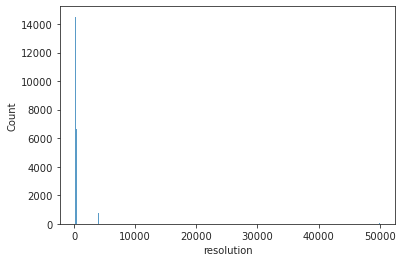

In [58]:
sns.histplot(length_dist_table["resolution"])

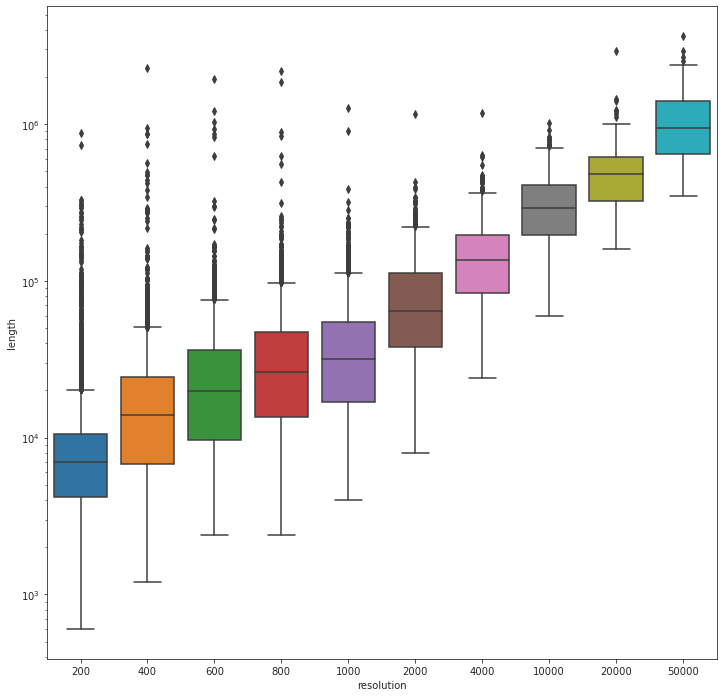

In [68]:
fig, ax = plt.subplots(figsize = (12,12))
sns.set_style("ticks")
ax.set_yscale("log")
ax = sns.boxplot(x="resolution",y="length",data=length_dist_table)
plt.savefig("boundary_dist.pdf")

In [69]:
#Boundaryの数を出力
for res in resolution_list:
    print("reolution:"+str(res))
    print("num",len(length_dist_table[length_dist_table["resolution"] == res]))
    print("median",length_dist_table[length_dist_table["resolution"] == res]["length"].median())
    print("\n")

reolution:200
num 14508
median 7000.0


reolution:400
num 6607
median 14000.0


reolution:600
num 4471
median 19800.0


reolution:800
num 3342
median 26400.0


reolution:1000
num 2747
median 32000.0


reolution:2000
num 1386
median 64000.0


reolution:4000
num 754
median 136000.0


reolution:10000
num 352
median 290000.0


reolution:20000
num 210
median 480000.0


reolution:50000
num 89
median 950000.0


